In [1]:
import tensorflow as tf

In [2]:
from keras.preprocessing.image import ImageDataGenerator

In [3]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
train_generator = train_datagen.flow_from_directory(
        'dataset/training_set',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

Found 7991 images belonging to 2 classes.


In [4]:
test_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = test_datagen.flow_from_directory(
        'dataset/test_set',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

Found 7991 images belonging to 2 classes.


In [5]:
#Build CNN Model
#Initialize
cnn = tf.keras.models.Sequential()

In [6]:
#Convolution
cnn.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, activation = 'relu', input_shape = [64,64,3]))

In [7]:
#Pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2))

In [8]:
#Add 1 more Layer
cnn.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, activation = 'relu'))

cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2))

In [9]:
#Flatten
cnn.add(tf.keras.layers.Flatten())

In [10]:
#Full Connection
cnn.add(tf.keras.layers.Dense(units = 128, activation = 'relu'))

In [11]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

In [12]:
#Compile the model
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [13]:
history = cnn.fit(x = train_generator, validation_data = validation_generator, epochs = 20)

Epoch 1/20
250/250 [==============================] - 47s 188ms/step - loss: 0.6621 - accuracy: 0.5923 - val_loss: 0.5869 - val_accuracy: 0.6871
Epoch 2/20
250/250 [==============================] - 48s 191ms/step - loss: 0.5977 - accuracy: 0.6804 - val_loss: 0.5805 - val_accuracy: 0.6909
Epoch 3/20
250/250 [==============================] - 48s 192ms/step - loss: 0.5665 - accuracy: 0.7035 - val_loss: 0.5046 - val_accuracy: 0.7493
Epoch 4/20
250/250 [==============================] - 48s 193ms/step - loss: 0.5300 - accuracy: 0.7343 - val_loss: 0.4708 - val_accuracy: 0.7798
Epoch 5/20
250/250 [==============================] - 49s 194ms/step - loss: 0.4998 - accuracy: 0.7508 - val_loss: 0.4652 - val_accuracy: 0.7781
Epoch 6/20
250/250 [==============================] - 51s 206ms/step - loss: 0.4943 - accuracy: 0.7606 - val_loss: 0.5118 - val_accuracy: 0.7566
Epoch 7/20
250/250 [==============================] - 50s 202ms/step - loss: 0.4746 - accuracy: 0.7756 - val_loss: 0.4321 - val_ac

In [14]:
#Make Single Prediction
import numpy as np
from keras.preprocessing import image
test_image = image.load_img("dataset/single_prediction/prediction1.jpg", target_size = (64,64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
train_generator.class_indices
if result[0][0] == 1:
    prediction = 'dog'
else:
    prediction = 'cat'

In [15]:
prediction

'dog'

In [16]:
import matplotlib.pyplot as plt
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


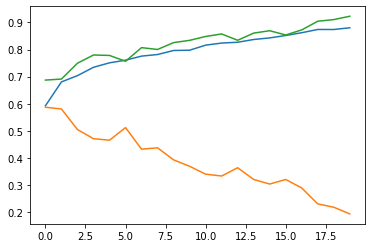

In [17]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['val_accuracy'])